      Voltage    Current  AmbientTemp       Load  RunningTime   TempRise
0  218.727006  11.420316    21.546858  58.446753    87.796250  45.346533
1  247.535715   5.841400    33.538294  63.929517    26.779295  42.769695
2  236.599697   6.616287    27.578786  58.850524    73.391720  45.453154
3  229.932924  13.985542    32.396862  54.435127    76.738655  54.159587
4  207.800932  11.064291    24.800744  56.031794    56.654374  44.810492

Model Coefficients: [0.03192648 0.79741846 0.65062721 0.09522512 0.0666346 ]
Intercept: 3.4723887978062677
R² Score: 0.8437600885956081
MAE: 1.358005769961511
RMSE: 1.7709620403197122


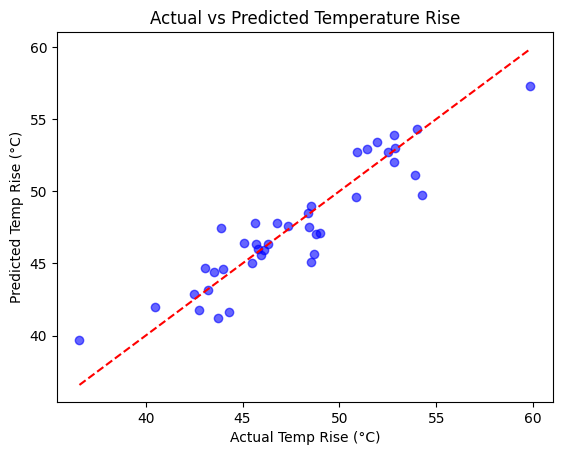


Predicted Temperature Rise for new data: 49.92456710861345 °C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})

print(df.head())

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 3: Train Regression Model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# Step 4: Predictions & Evaluation
# ---------------------------
y_pred = model.predict(X_test)

print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Actual vs Predicted Temperature Rise")
plt.show()

# ---------------------------
# Step 6: Predict for New Data
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})
predicted_temp = model.predict(new_data)
print("\nPredicted Temperature Rise for new data:", predicted_temp[0], "°C")


# Assignment

**Assignment using Decision Tree regressor along with linear regression and their comparision**

**Harsimran Singh**

**1024060108**

## Implement the same problem using the Decision Tree Regressor and Compare the results.

LINEAR REGRESSION RESULTS:
Model Coefficients: [0.03192648 0.79741846 0.65062721 0.09522512 0.0666346 ]
Intercept: 3.4723887978062677
R² Score: 0.8437600885956081
MAE: 1.358005769961511
RMSE: 1.7709620403197122

DECISION TREE REGRESSOR RESULTS:
Feature Importances: [0.0169136  0.38216345 0.35427976 0.07901319 0.16763   ]
R² Score: 0.49290626676122107
MAE: 2.5008785983398694
RMSE: 3.1904899588435955


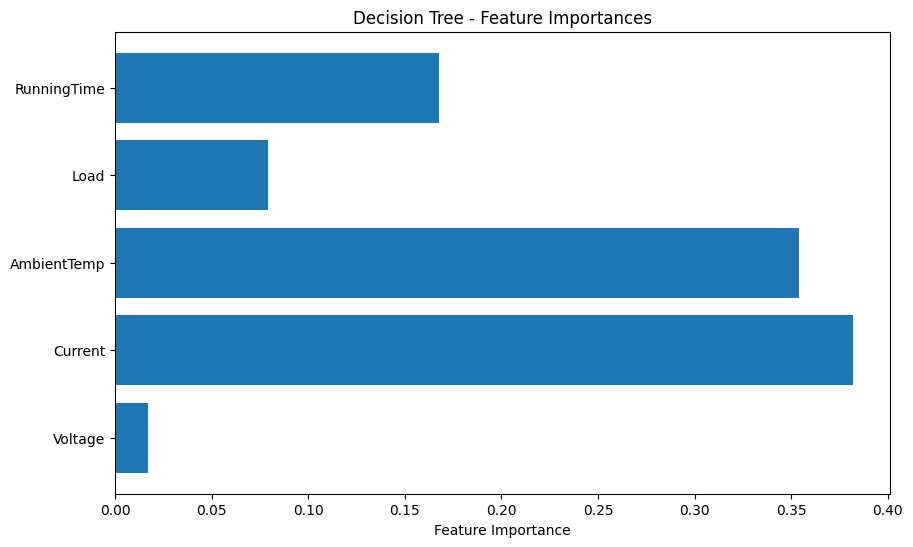

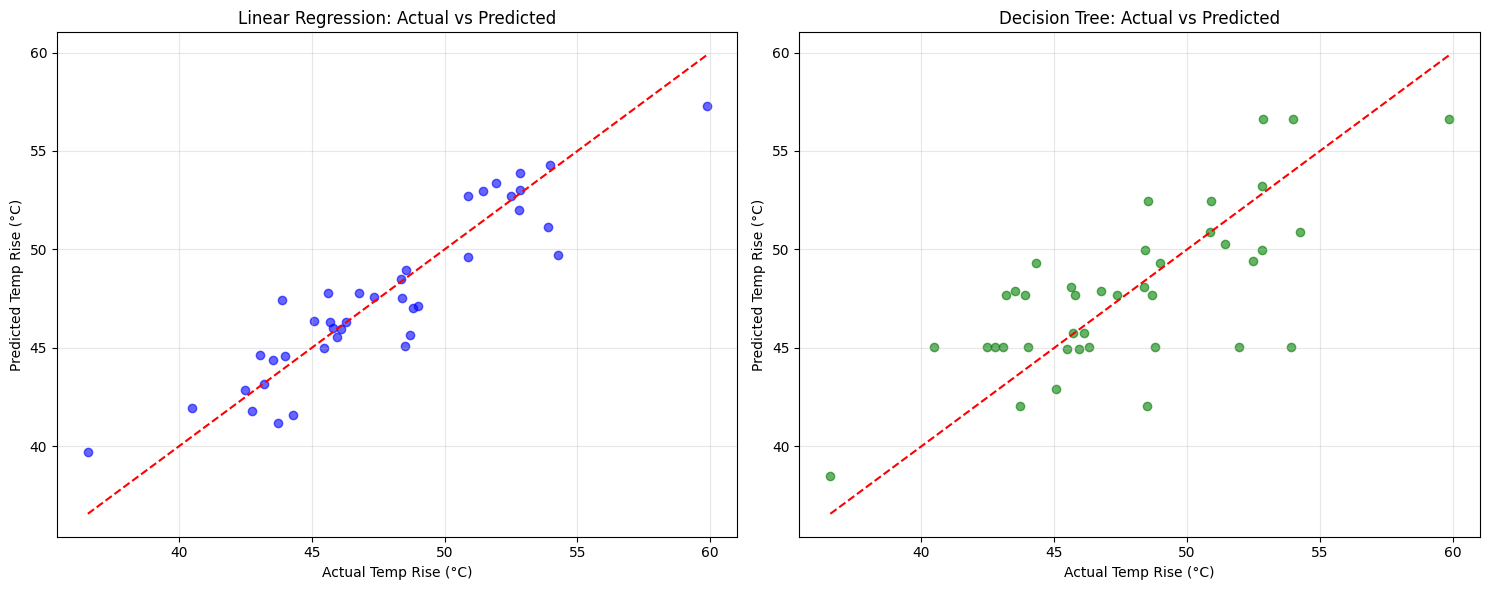


COMPARISON SUMMARY:
               Model  R² Score       MAE      RMSE
0  Linear Regression  0.843760  1.358006  1.770962
1      Decision Tree  0.492906  2.500879  3.190490

Predicted Temperature Rise:
Linear Regression: 49.92 °C
Decision Tree: 51.91 °C


In [2]:
#Assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Synthetic Dataset
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model
temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})

# Step 2: Train/Test Split
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Both Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Limiting depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Step 4: Predictions & Evaluation
# Linear Regression
lr_y_pred = lr_model.predict(X_test)

# Decision Tree
dt_y_pred = dt_model.predict(X_test)

print("=" * 50)
print("LINEAR REGRESSION RESULTS:")
print("=" * 50)
print("Model Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("R² Score:", r2_score(y_test, lr_y_pred))
print("MAE:", mean_absolute_error(y_test, lr_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_y_pred)))

print("\n" + "=" * 50)
print("DECISION TREE REGRESSOR RESULTS:")
print("=" * 50)
print("Feature Importances:", dt_model.feature_importances_)
print("R² Score:", r2_score(y_test, dt_y_pred))
print("MAE:", mean_absolute_error(y_test, dt_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_y_pred)))

# Step 5: Feature Importance Visualization
feature_names = X.columns
importances = dt_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Feature Importances')
plt.show()

# Step 6: Comparison Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
ax1.scatter(y_test, lr_y_pred, color="blue", alpha=0.6)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--")
ax1.set_xlabel("Actual Temp Rise (°C)")
ax1.set_ylabel("Predicted Temp Rise (°C)")
ax1.set_title("Linear Regression: Actual vs Predicted")
ax1.grid(True, alpha=0.3)

# Decision Tree
ax2.scatter(y_test, dt_y_pred, color="green", alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--")
ax2.set_xlabel("Actual Temp Rise (°C)")
ax2.set_ylabel("Predicted Temp Rise (°C)")
ax2.set_title("Decision Tree: Actual vs Predicted")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 7: Error Comparison
models = ['Linear Regression', 'Decision Tree']
r2_scores = [r2_score(y_test, lr_y_pred), r2_score(y_test, dt_y_pred)]
mae_scores = [mean_absolute_error(y_test, lr_y_pred), mean_absolute_error(y_test, dt_y_pred)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_y_pred)),
               np.sqrt(mean_squared_error(y_test, dt_y_pred))]

metrics_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

print("\n" + "=" * 50)
print("COMPARISON SUMMARY:")
print("=" * 50)
print(metrics_df)

# Step 8: Predict for New Data with Both Models
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})

lr_predicted_temp = lr_model.predict(new_data)
dt_predicted_temp = dt_model.predict(new_data)

print(f"\nPredicted Temperature Rise:")
print(f"Linear Regression: {lr_predicted_temp[0]:.2f} °C")
print(f"Decision Tree: {dt_predicted_temp[0]:.2f} °C")